# Population performance of benchmark winners

We study the problem of drawing reliable conclusions about the winner: $\hat{\imath} = \underset{i\in[m]}{\text{argmax}} \ X_i$, where $X_1,\dots,X_m$ are $m$ competing candidates.

In this notebook we analyze the population performance of benchmark winners. In the first example, we infer the population accuracy of the best TorchVision model, in terms of both top 1 and top 5 accuracy. The accuracies can be found [here](https://pytorch.org/vision/stable/models.html?fbclid=IwY2xjawFKrb9leHRuA2FlbQIxMAABHR_IjqeXFNGMex7cAqRt2Dusm9AguGW29-7C-oSYzBdLuTnDGtQ0Zy5SYQ_aem_qORwdM1YKothjcCN51LEqA). In the second example, we infer the population win rate and Bradley-Terry coefficient of the winning LLM on Chatbot Arena [1]. See the paper for further details.

[1] Chiang, W. L., Zheng, L., Sheng, Y., Angelopoulos, A. N., Li, T., Li, D., Zhang, H., Zhu, B., Jordan, M., Gonzalez, J.E., & Stoica, I. (2024). Chatbot Arena: An open platform for evaluating LLMs by human preference. ICML.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy.stats import norm
import warnings; warnings.simplefilter('ignore')
from methods import *
from utils import *

## TorchVision

In [2]:
data = pd.read_csv('data/torchvision.csv')
# top 1; analogous for top 5
X = data['top1_acc']
sigmas = data['top1_sigma']
m = len(X)
alpha = 0.1
ihat = np.argmax(X)

# locally simultaneous inference
nu = 0.01
plausible_gap = 4*norm.isf(nu/(2*m))*sigmas
LSI_int = LSI_union_bound(X, sigmas, plausible_gap, alpha = alpha, nu = nu)

# simultaneous inference
SI_int = [X[ihat] - norm.isf(alpha/(2*m))*sigmas[ihat], X[ihat] + norm.isf(alpha/(2*m))*sigmas[ihat]]

# zoom correction
zoom_int = zoom_union_bound(X, sigmas, alpha = alpha)

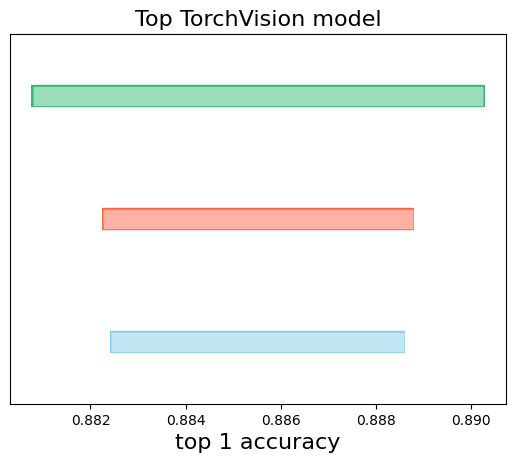

In [3]:
labels = ["simultaneous", "locally simultaneous", "zoom"]
make_intervals([SI_int, LSI_int, zoom_int], labels, "Top TorchVision model", "top 1 accuracy", legend=False)
path = 'plots/torchvision_top1.pdf'
plt.savefig(path, bbox_inches='tight')

## Chatbot Arena

In [4]:
data = pd.read_csv('data/chatbot_arena_BT.csv')
# Bradley-Terry score; analogous for win rate
X = data['BT_score']
sigmas = data['sigma']
m = len(X)
alpha = 0.1
ihat = np.argmax(X)

# locally simultaneous inference
nu = 0.01
plausible_gap = 4*norm.isf(nu/(2*m))*sigmas
LSI_int = LSI_union_bound(X, sigmas, plausible_gap, alpha = alpha, nu = nu)

# simultaneous inference
SI_int = [X[ihat] - norm.isf(alpha/(2*m))*sigmas[ihat], X[ihat] + norm.isf(alpha/(2*m))*sigmas[ihat]]

# zoom correction
zoom_int = zoom_union_bound(X, sigmas, alpha = alpha)

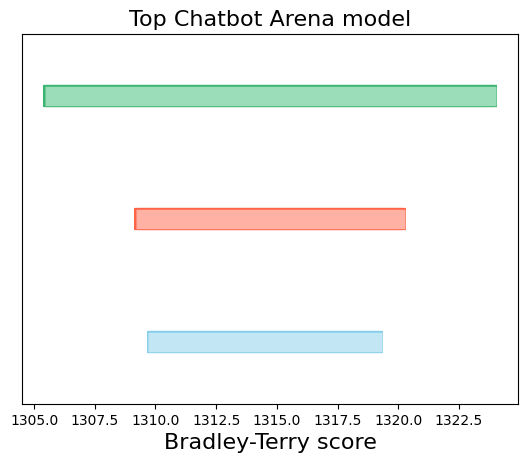

In [5]:
labels = ["simultaneous", "locally simultaneous", "zoom"]
make_intervals([SI_int, LSI_int, zoom_int], labels, "Top Chatbot Arena model", "Bradley-Terry score", legend=False)
path = 'plots/chatbot_arena_BT.pdf'
plt.savefig(path, bbox_inches='tight')